# Machine Learning 
<font color="PURPLE" size=4>Assignment : </font> 3
<br>
<font color="PURPLE" size=4>Author: </font> Mylonaki Angeliki
<br>
<font color="PURPLE" size=4>Applying Classification Project Template in MNIST Dataset<font>

## Step 1: Prepare Project

1. Load libraries
2. Load dataset

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
#%matplotlib inline
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import Normalizer
from numpy import set_printoptions


class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'
    
    
    

In [81]:
df = pd.read_csv("./digit_recognizer_dataset.csv")
df_subset=df[:1000]
print(df_subset.head(20))


    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       4       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       7       0       0       0       0       0       0       0       0   
7       3       0       0       0       0       0       0       0       0   
8       5       0       0       0       0       0       0       0       0   
9       3       0       0       0       0       0       0       0       0   
10      8       0       0       0       0       0       0       0       0   
11      9       0       0       0       0       0       0       0       0   

## Step 2: Define Problem
What is your task? What are your goals? What do you want to achieve?

Based on the combination of the pixels (columns) present in the dataset, we want to find the best model and develop it in odrer to predict digits given data in the same format.

## Step 3: Exploratory Analysis
Understand your data: Take a “peek” of your data, answer basic questions about the dataset.
Summarise your data. Explore descriptive statistics and visualisations.

In [82]:
#Peek of our data
print(df_subset.head(20))

#Descriptive Statistics
print(df_subset.describe())

#Data dimentions
print df_subset.shape

#Data types
print df_subset.dtypes

#Checking for missing values
if not df_subset.isnull().any().any():
    print color.PURPLE + "\nThere are no missing values in given dataset\n" + color.END
else:
    print "\nThere are missing values in the dataset...\nExiting..."
    exit
    
#class distribution
print color.BOLD + "Class distribution: "+ color.END + str(df_subset.groupby('label').size())

def plot_correlations(NoElements, labels):
    correlations = df.corr()
    # plot correlation matrix
    fig = plt.figure(figsize=(15, 14))
    ax = fig.add_subplot(111)
    cax = ax.matshow(correlations, vmin=-1, vmax=1)
    fig.colorbar(cax)
    ticks = np.arange(0,NoElements,1)
    ax.set_xticks(ticks)
    ax.set_yticks(ticks)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels)
    plt.show()
    
def plot_histogram(dataset):
    dataset.hist()
    plt.show()

def plot_scatter_matrix(dataset):
    scatter_matrix(dataset,figsize=(8,8))
    plt.show()
    
def visualize_data(dataset,NoElements,labels):    
    plot_correlations(NoElements,labels)
    plot_histogram(dataset)
    plot_scatter_matrix(dataset)

features=["pixel" + str(i) for i in range(1,784)]
#visualize_data(df_subset,784,features) #Cannot really calculate correlations in my PC :( 


    label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0       1       0       0       0       0       0       0       0       0   
1       0       0       0       0       0       0       0       0       0   
2       1       0       0       0       0       0       0       0       0   
3       4       0       0       0       0       0       0       0       0   
4       0       0       0       0       0       0       0       0       0   
5       0       0       0       0       0       0       0       0       0   
6       7       0       0       0       0       0       0       0       0   
7       3       0       0       0       0       0       0       0       0   
8       5       0       0       0       0       0       0       0       0   
9       3       0       0       0       0       0       0       0       0   
10      8       0       0       0       0       0       0       0       0   
11      9       0       0       0       0       0       0       0       0   

## Step 4: Prepare Data
Data Cleaning/Data Wrangling/Collect more data (if necessary).

In [83]:
array = df_subset.values
# separate array into input and output components
X = array[:,1:784]
Y = array[:,0]
#Getting all possible label values
class_names=np.unique(Y).tolist()

#Normalization
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

# summarise transformed data
set_printoptions(precision=3)
print color.BOLD + "Normalizing data....." + color.END
print color.BOLD + "Printing example....." +color.END
print(normalizedX[1])


print color.BOLD + "\nStandardizing data....." + color.END
print color.BOLD + "Printing example....." + color.END

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(normalizedX)
rescaledX = scaler.transform(normalizedX)
# summarise transformed data
set_printoptions(precision=3)
print(rescaledX[1])


Normalizing data.....
Printing example.....
[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.006  0.009  0.043  0.043  0.06   0.027  0.022  0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.   

## Step 5: Feature Engineering
Feature selection/feture engineering (as in new features)/data transformations.

In [84]:
#In case that correlations exist, we can use PCA to handle them.
# Feature Extraction with PCA
from sklearn.decomposition import PCA
# feature extraction
pca = PCA(n_components=700)
finalX = pca.fit_transform(rescaledX)
print finalX


[[ -4.755e+00  -7.715e+00  -9.553e-01 ...,   0.000e+00   0.000e+00
   -0.000e+00]
 [  1.408e+01   9.398e-01   3.058e+00 ...,  -2.549e-16  -2.586e-16
   -8.052e-16]
 [ -8.429e+00  -2.787e+00   1.076e+00 ...,  -1.205e-16  -3.003e-16
    2.882e-16]
 ..., 
 [ -7.294e+00   8.349e+00  -7.448e-01 ...,   7.844e-17   2.936e-16
    2.062e-16]
 [  2.338e+00  -6.751e+00  -3.260e+00 ...,   1.976e-16   2.506e-16
    2.522e-16]
 [  8.311e-02   6.056e+00   3.997e+00 ...,  -1.895e-16   4.772e-16
    1.358e-16]]


Creating Validation Dataset

In [85]:
from sklearn import model_selection
#keeping a test sample to use in our predictions.
X_train, X_test, y_train, y_test = model_selection.train_test_split(finalX, Y, test_size=0.20, random_state=7)


## Step 6: Algorithm Selection
Select a set of algorithms to apply, select evaluation metrics, and evaluate/compare algorithms.

 LR: 0.790000 (+/- 0.046704)
<type 'numpy.ndarray'>
LDA: 0.296250 (+/- 0.066156)
<type 'numpy.ndarray'>
kNN: 0.805000 (+/- 0.040000)
<type 'numpy.ndarray'>
 DT: 0.580000 (+/- 0.065955)
<type 'numpy.ndarray'>
 NB: 0.521250 (+/- 0.033564)
<type 'numpy.ndarray'>
SVM: 0.833750 (+/- 0.040331)
<type 'numpy.ndarray'>


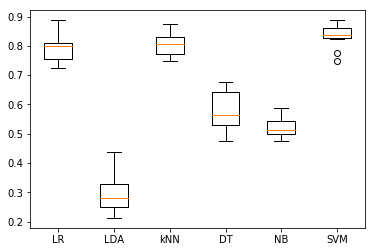

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Evaluation metric:accuracy
seed = 7
scoring = 'accuracy'
kfold = KFold(n_splits=10, random_state=7)


# Create a list, with one item per algorithm. Each item has a name, and a classifier object.
models = []
models.append(('LR',  LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('kNN', KNeighborsClassifier()))
models.append(('DT',  DecisionTreeClassifier()))
models.append(('NB',  GaussianNB()))
models.append(('SVM', SVC()))

results = []
names   = []


for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    print("%03s: %f (+/- %f)" % (name, cv_results.mean(), cv_results.std()))
    print type(cv_results)

plt.boxplot(results)
plt.xticks(list(range(1,len(names)+1)), names)
plt.show()


## Step 7: Model Training
Hyperparameter optimisation for winning algorithm (SVC)

In [87]:
#tuning hyperParameters
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

#Using RandomizedSearch to tube SVN hyoeroaraneter C

param_grid = {'C': uniform(),
             'kernel':[ "linear", "poly", "rbf", "sigmoid"],
             'gamma':uniform(),
             'coef0':uniform(),
             'shrinking':[True, False],
             'tol':uniform(),
             }
model = SVC()
rsearch = RandomizedSearchCV(estimator=model, param_distributions=param_grid, n_iter=100, random_state=7)
rsearch.fit(X, Y)





RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=1,
          param_distributions={'kernel': ['linear', 'poly', 'rbf', 'sigmoid'], 'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa069238a90>, 'coef0': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa06924e090>, 'tol': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa06924e250>, 'shrinking': [True, False], 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7fa069238c50>},
          pre_dispatch='2*n_jobs', random_state=7, refit=True,
          return_train_score=True, scoring=None, verbose=0)

## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

Score:  0.855
Confusion matrix
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  1  0]
 [ 0  1 22  0  0  0  0  2  3  0]
 [ 0  0  1 16  0  2  0  0  1  0]
 [ 0  0  0  0 17  0  1  0  0  2]
 [ 1  1  1  0  0 16  1  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  1  0  0  0 16  0  4]
 [ 0  0  0  0  0  0  1  0 12  0]
 [ 1  0  0  1  1  0  0  1  1 13]]


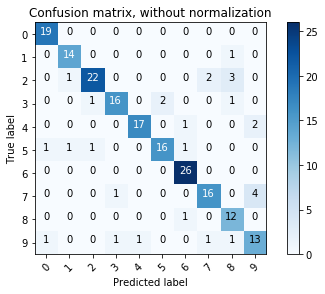

In [88]:
from sklearn.metrics import confusion_matrix
import itertools


model = SVC(kernel='linear', C= 0.69725171234332872,
            coef0=0.41102910240594281, tol=0.5262622111585703,
            shrinking=True, gamma=0.70043142820997084)

model.fit(X_train, y_train)
y_pred=model.predict(X_test)
print "Score: ", model.score(X_test,y_test)

#using Scikit-Learn code:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()

## Applying ensemble "Voting"


In [93]:
from sklearn.ensemble import VotingClassifier

ensemble = VotingClassifier(models,weights=[3,1,4,2,2,5])
results = cross_val_score(ensemble, X_train, y_train, cv=kfold)


## Step 8: Finalise Model
Predictions on validation set, create model from the entire (training) dataset.

Score:  0.845
Confusion matrix
[[19  0  0  0  0  0  0  0  0  0]
 [ 0 14  0  0  0  0  0  0  1  0]
 [ 0  1 22  0  0  0  0  2  3  0]
 [ 0  0  1 16  0  2  0  0  1  0]
 [ 0  0  0  0 17  0  1  0  0  2]
 [ 1  1  1  0  0 16  1  0  0  0]
 [ 0  0  0  0  0  0 26  0  0  0]
 [ 0  0  0  1  0  0  0 16  0  4]
 [ 0  0  0  0  0  0  1  0 12  0]
 [ 1  0  0  1  1  0  0  1  1 13]]


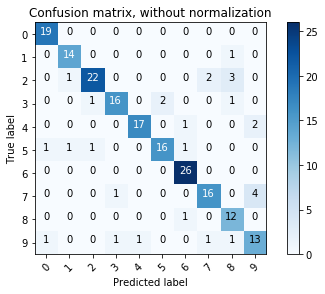

In [94]:
ensemble.fit(X_train, y_train)
y_pred=model.predict(X_test)
print "Score: ", ensemble.score(X_test,y_test)

#using Scikit-Learn code:http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

plt.show()